Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Aiman Lameesa"
ID = "st122876"

---

# Lab 05: Optimization Using Newton's Method

In this lab, we'll explore an alternative to gradient descent
for nonlinear optimization problems: Newton's method.

## Newton's method in one dimension

Consider the problem of finding the *roots* $\textbf{x}$ of a nonlinear function $f: \mathbb{R}^N \rightarrow \mathbb{R}$. A root of $f$ is a point $\mathbf{x}$ that satisfies $f(\mathbf{x}) = 0$.

In one dimension, Newton's method for finding zeroes works as follows:

1. Pick an initial guess $x_0$

2. Let $x_{i+1} = x_i + \frac{f(x_i)}{f'(x_i)}$

3. If not converged, go to #2.

Convergence occurs when $|f(x_i)| < \epsilon_1$ or when $|f(x_{i+1})-f(x_i)| < \epsilon_2$.

Let's see how this works in practice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

### Example 1: Root finding for cubic polynomial 

In [2]:
def fx(x, p):
    f_x = np.polyval(p, x)
    return f_x

In [3]:
n = 200
x = np.linspace(-3, 3, n)  

# Create the polynomial f(x) = x^3 + x^2 
p = np.poly1d([1, 1, 0, 0]) # [x^3, x^2, x^1, 1]

# Derivative of a polynomial
# This is a convenient method to obtain p_d = np.poly1d([3, 2, 0])
p_d = np.polyder(p)
print('p derivative:', p_d)
print('p derivative:', p_d[2], p_d[1], p_d[0])

# Get values for f(x) and f'(x) for graphing purposes
y = fx(x, p)
y_d = fx(x,p_d)

p derivative:    2
3 x + 2 x
p derivative: 3 2 0


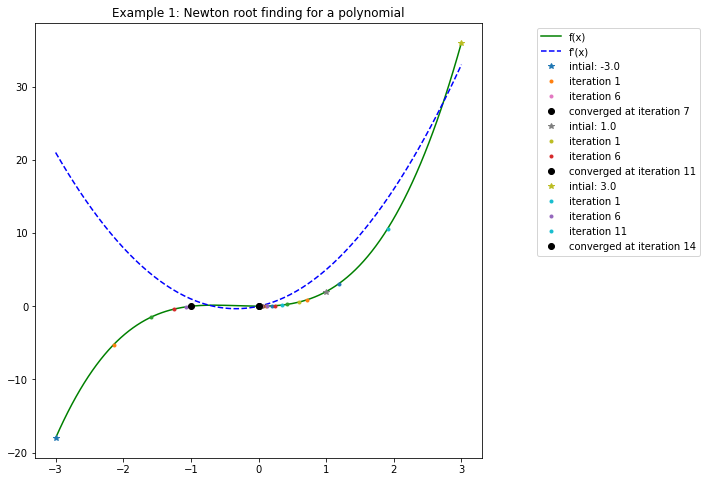

In [4]:
# Try three possible guesses for x0
x0_arr = [-3.0, 1.0, 3.0]
max_iter = 30
threshold = 0.001
roots = []

fig1 = plt.figure(figsize=(8,8)) 
ax = plt.axes()
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label="f\'(x)")

for x0 in x0_arr:
    # Plot initial data point
    plt.plot(x0, fx(x0,p), '*', label='intial: ' + str(x0))    
    i = 0
    while i < max_iter:
        # x1 = x0 - f(x0)/f'(x0)
        x1 = x0 - fx(x0, p) / fx(x0, p_d)
        # Check for delta (x) less than threshold
        if np.abs(x0 - x1) <= threshold:
            roots.append(round(x1,4))
            break;
        # Plot current root after every 5 iterations
        if i % 5 == 0:
            plt.plot(x1, fx(x1, p), '.', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx(x1, p), '.')        
        x0 = x1
        i = i + 1
    plt.plot(x1, fx(x1, p), 'ko', label='converged at iteration '+ str(i+1))

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 1: Newton root finding for a polynomial')

plt.show()

#### Example 2: Root finding for sine function

In [5]:
def fx_sin(x):  
    f_x = np.sin(x)        
    return f_x

def fx_dsin(x):    
    return np.cos(x)

In [6]:
n = 200

x = np.linspace(-np.pi, np.pi, n)  

# Get f(x) and f'(x) for plotting
y = fx_sin(x)
y_d = fx_dsin(x)

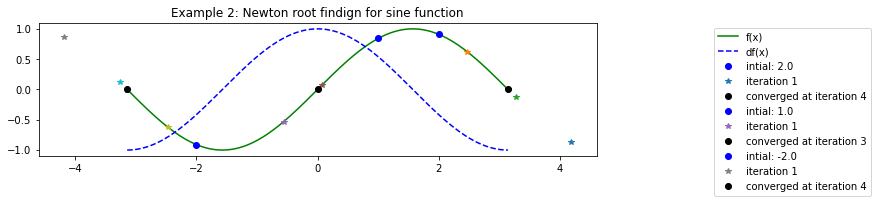

Roots: 3.141593, 0.000000, -3.141593


In [7]:
# Consider three possible starting points
x0_arr = [2.0, 1.0, -2.0]
max_iter = 30
i = 0
threshold = 0.01
roots = []

fig1 = plt.figure(figsize=(10,10)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label='df(x)')

for x0 in x0_arr:
    plt.plot(x0, fx_sin(x0), 'bo', label='intial: ' + str(x0))
    i = 0;
    while i < max_iter:
        x1 = x0 - fx_sin(x0) / fx_dsin(x0)
        if np.abs(x0 - x1) <= threshold:
            roots.append(x1)
            plt.plot(x1,fx_sin(x1),'ko',label='converged at iteration '+ str(i))
            break;
        if i % 5 == 0:
            plt.plot(x1, fx_sin(x1), '*', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx_sin(x1), '*')        
        x0 = x1
        i = i + 1

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 2: Newton root findign for sine function')

plt.show()

print('Roots: %f, %f, %f' % (roots[0], roots[1], roots[2]))


## Newton's method for optimization

Now, consider the problem of minimizing a scalar function $J : \mathbb{R}^n \mapsto \mathbb{R}$.
We would like to find
$$ \theta^* = \text{argmin}_\theta J(\theta) $$
We already know gradient descent:
$$ \theta^{(i+1)} \leftarrow \theta^{(i)} - \alpha \nabla_J(\theta^{(i)}).$$
But Newton's method gives us a potentially faster way to find $\theta^*$ as a zero of
the system of equations
$$\nabla_J(\theta^*) = \mathbf{0}.$$

In one dimension, to find the zero of $f'(x)$, obviously, we would apply Newton's method
to $f'(x)$, obtaining the iteration
$$x_{i+1} = x_i - f'(x_i) / f''(x_i).$$
The multivariate extension of Newton's optimization method is
$$\mathbf{x}_{i+1} = \mathbf{x}_i - \mathtt{H}_f(\mathbf{x}_i) \nabla_f(\mathbf{x}_i),$$
where $\mathtt{H}_f(\mathbf{x})$ is the *Hessian* of $f$ evaluated at $\textbf{x}$:
$$\mathtt{H}_f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 x_n} \\
\frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n x_1} & \frac{\partial^2 f}{\partial x_n x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}$$

This means, for the minimization of $J(\theta)$, we would obtain the update rule
$$\theta^{(i+1)} \leftarrow \theta^{(i)} - \mathtt{H}_J(\theta^{(i)}) \nabla_J(\theta^{(i)}).$$


## Application to logistic regression

Let's create some difficult sample data as follows:

**Class 1:** Two features $x_1$ and $x_2$ jointly distributed as a two-dimensional spherical Gaussian with parameters

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

**Class 2:** Two features $x_1$ and $x_2$ in which the data are generated by first sampling an angle $\theta$ according to a uniform distribution, sampling a distance $d$ according to a one-dimensional Gaussian with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$, then outputting the point $$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$.

Generate 100 samples for each of the classes.

### Exercise 1.1 (5 points)

Generate data for class 1 with 100 samples

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html">numpy.random.multivariate_normal</a> to generate samples.
</details>

In [8]:
mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100

cov_mat = None
X1 = None

# YOUR CODE HERE 
cov_mat = np.matrix([[sigma_1**2, 0], [0, sigma_1**2]])
X1 = np.random.multivariate_normal(mu_1, cov_mat, num_sample)
# raise NotImplementedError()

In [9]:
print(X1[:5])

# Test function: Do not remove
assert X1.shape == (100, 2), 'Size of X1 is incorrect'
assert cov_mat.shape == (2, 2), 'Size of x_test is incorrect'
count = 0 
for i in range(2):
    for j in range(2):
        if i==j and cov_mat[i,j] != 0:
            if cov_mat[i,j] == sigma_1:
                count += 1
        else:
            if cov_mat[i,j] == 0:
                count += 1
assert count == 4, 'cov_mat data is incorrect'

print("success!")
# End Test function

[[ 0.86675594  1.07582552]
 [ 1.37493905  1.35979643]
 [-0.32532951  1.6966452 ]
 [ 1.76685033  1.91318294]
 [ 0.75303162  3.06960352]]
success!


**Expect result (or looked alike):**\
[[-0.48508229  2.65415886]\
 [ 1.17230227  1.61743589]\
 [-0.61932146  3.53986541]\
 [ 0.70583088  1.45944356]\
 [-0.93561505  0.2042285 ]]

### Exercise 1.2 (5 points)

Generate data for class 2 with 100 samples

$$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$.

with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html">numpy.random.uniform</a> and/or <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html">numpy.random.normal</a> to generate samples.
</details>

In [10]:
# 1. Create sample angle from 0 to 2pi with 100 samples
angle = None
# 2. Create sample with normal distribution of d with mean and variance
d =  None
# 3 Create X2
X2 = None

# YOUR CODE HERE
num_samples = 100 
angle = np.random.uniform(0, 2*np.pi, 100)
num_sample = 100

mean = np.square(3 * sigma_1)
var = np.square(.5 * sigma_1)
d =  np.random.normal(mean, var, num_sample)

X2 = np.array([X1[:,0] + d*np.cos(angle), X1[:,1] + d*np.sin(angle)]).T
# raise NotImplementedError()

In [11]:
print('angle:',angle[:5])
print('d:', d[:5])
print('X2:', X2[:5])

# Test function: Do not remove
assert angle.shape == (100,) or angle.shape == (100,1) or angle.shape == 100, 'Size of angle is incorrect'
assert d.shape == (100,) or d.shape == (100,1) or d.shape == 100, 'Size of d is incorrect'
assert X2.shape == (100,2), 'Size of X2 is incorrect'
assert angle.min() >= 0 and angle.max() <= 2*np.pi, 'angle generate incorrect'
assert d.min() >= 8 and d.max() <= 10, 'd generate incorrect'
assert X2[:,0].min() >= -13 and X2[:,0].max() <= 13, 'X2 generate incorrect'
assert X2[:,1].min() >= -10 and X2[:,1].max() <= 13.5, 'X2 generate incorrect'

print("success!")
# End Test function

angle: [3.53376958 0.43435913 3.38451168 5.4623819  4.06985975]
d: [8.89537573 8.99893233 8.67333614 8.91739632 8.80899518]
X2: [[-7.35327599 -2.32399571]
 [ 9.53822984  5.14680929]
 [-8.7440163  -0.38961283]
 [ 7.84524714 -4.6116197 ]
 [-4.52551399 -3.98272605]]
success!


**Expect result (or looked alike):**\
angle: [4.77258271 3.19733552 0.71226709 2.11244845 6.06280915]\
d: [9.13908279 8.84218552 9.24427852 8.74831667 8.85727588]\
X2: [[ 0.064701   -6.46837219]\
 [-7.65614929  1.12480234]\
 [ 6.37750805  9.58147629]\
 [-3.80438416  8.95550952]\
 [ 7.70745021 -1.73194274]]

### Exercise 1.3 (5 points)

Combine X1 and X2 into single dataset

In [12]:
# 1. concatenate X1, X2 together
X = None
# 2. Create y with class 1 as 0 and class 2 as 1
y = None

# YOUR CODE HERE
X = np.concatenate([X1, X2],axis = 0)
y = np.append(np.zeros(num_sample),np.ones(num_sample))
y = np.array([y]).T
# raise NotImplementedError()

In [13]:
print("shape of X:", X.shape)
print("shape of y:", y.shape)

# Test function: Do not remove
assert X.shape == (200, 2), 'Size of X is incorrect'
assert y.shape == (200,) or y.shape == (200,1) or y.shape == 200, 'Size of y is incorrect'
assert y.min() == 0 and y.max() == 1, 'class type setup is incorrect'

print("success!")
# End Test function

shape of X: (200, 2)
shape of y: (200, 1)
success!


**Expect result (or looked alike):**\
shape of X: (200, 2)\
shape of y: (200, 1)

### Exercise 1.4 (5 points)

Plot the graph between class1 and class2 with **difference color and point style**.

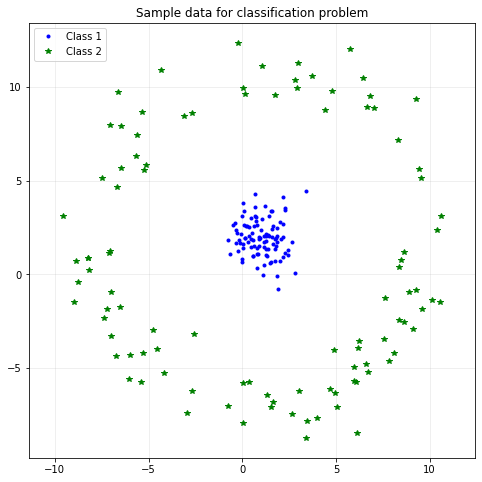

In [14]:
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
# plot graph here

# YOUR CODE HERE
plt.plot(X1[:,0],X1[:,1],'b.', label = 'Class 1')
plt.plot(X2[:,0],X2[:,1],'g*', label = 'Class 2')
plt.legend(loc=2)
# raise NotImplementedError()
# end plot graph
plt.axis('equal')
plt.show()

**Expect result (or looked alike):**

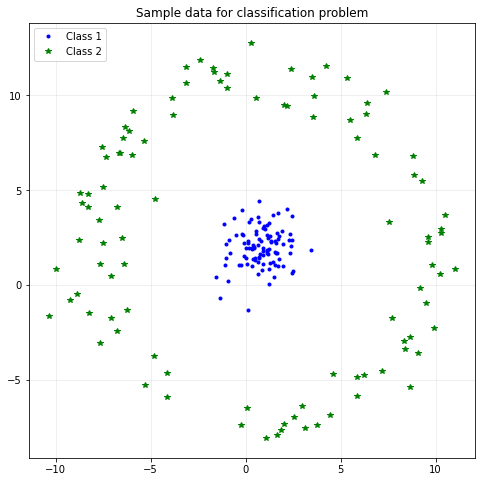

### Exercise 1.5 (5 points)

Split data into training and test datasets with 80% of training set and 20% of test set

In [15]:
train_size = 0.8

idx_train = None
idx_test = None

X_train = None
X_test = None
y_train = None
y_test = None

# YOUR CODE HERE
idx = np.arange(0,y.shape[0])
np.random.seed(14)
np.random.shuffle(idx)
idx_train = idx[0: int(train_size*len(X))]
idx_test = idx[int(train_size*len(X)):len(idx)]

X_train = X[idx_train]
y_train = y[idx_train]
X_test = X[idx_test]
y_test = y[idx_test]
# raise NotImplementedError()

In [16]:
print('idx_train:', idx_train[:10])
print("train size, X:", X_train.shape, ", y:", y_train.shape)
print("test size,  X:", X_test.shape,  ", y:", y_test.shape)

# Test function: Do not remove
assert X_train.shape == (160, 2), 'Size of X_train is incorrect'
assert y_train.shape == (160,) or y_train.shape == (160,1) or y.shape == 160, 'Size of y_train is incorrect'
assert X_test.shape == (40, 2), 'Size of X_test is incorrect'
assert y_test.shape == (40,) or y_test.shape == (40,1) or y.shape == 40, 'Size of y_test is incorrect'

print("success!")
# End Test function

idx_train: [114 189 198 151   5  69  24  15  51 112]
train size, X: (160, 2) , y: (160, 1)
test size,  X: (40, 2) , y: (40, 1)
success!


**Expect reult (Or looked alike):**\
idx_train: [ 78  61  28 166  80 143   6  76  98 133]\
train size, X: (160, 2) , y: (160, 1) \
test size,  X: (40, 2) , y: (40, 1)

### Exercise 1.6 (5 points)

Write the function which normalize X set

#### Practice yourself (No grade, but has extra score 3 points)

Try to use Jupyter notebook to write the normalize equation.

YOUR ANSWER HERE


$$X_{\text{norm}} = \frac{ X -\mu} {\sigma}$$

In [17]:
def normalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    # X_norm = None
    # YOUR CODE HERE
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)   
    
    X_norm = (X-mean)/std
    # raise NotImplementedError()
    
    return X_norm

In [18]:
XX = normalization(X)

X_train_norm = XX[idx_train]
X_test_norm = XX[idx_test]

# Add 1 at the first column of training dataset (for bias) and use it when training
X_design_train = np.insert(X_train_norm,0,1,axis=1)
X_design_test = np.insert(X_test_norm,0,1,axis=1)

m,n = X_design_train.shape

print(X_train_norm.shape)
print(X_design_train.shape)
print(X_test_norm.shape)
print(X_design_test.shape)

# Test function: Do not remove
assert XX[:,0].min() >= -2.5 and XX[:,0].max() <= 2.5, 'Does the XX is normalized?'
assert XX[:,1].min() >= -2.5 and XX[:,1].max() <= 2.5, 'Does the XX is normalized?'

print("success!")
# End Test function

(160, 2)
(160, 3)
(40, 2)
(40, 3)
success!


### Exercise 1.7 (10 points)

define class for logistic regression: batch gradient descent

The class includes:

 - **Sigmoid** function $$sigmoid(z) = \frac{1}{1+e^{-z}}$$
 - **Softmax** function $$softmax(z) = \frac{e^{z_i}}{\sum_n{e^z}}$$
 - **Hyperthesis (h)** function $$\hat{y} = h(X;\theta) = softmax(\theta . X)$$
 - **Gradient (Negative likelihood)** function $$gradient = - X . \frac{y-\hat{y}}{n}$$
 - **Cost** function $$cost = \frac{\sum{((-y\log{\hat{y}}) - ((1-y)\log{(1 - \hat{y})})})}{n}$$
 - **Gradient ascent** function
 - **Prediction** function
 - **Get accuracy** funciton

In [19]:
class Logistic_BGD:
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = None
        # YOUR CODE HERE
        s = 1/ (1 + np.exp(-z))
        # raise NotImplementedError()
        return s

    def softmax(self, z):
        sm = None
        # YOUR CODE HERE
        sm = np.exp(z) / np.sum(np.exp(z))
        # raise NotImplementedError()
        return sm
    
    def h(self,X, theta):
        hf = None
        # YOUR CODE HERE
        y_hat = np.dot(X,theta)
        hf = self.sigmoid(y_hat)
        # raise NotImplementedError()
        return hf
    
    def gradient(self, X, y, y_pred):
        grad = None
        # YOUR CODE HERE
        n = X.shape[0]
        grad = np.dot(-X.T, (y-y_pred)/n)
        # raise NotImplementedError()
        return grad
        
    def costFunc(self, theta, X, y):
        cost = None
        grad = None
        # YOUR CODE HERE
        n = len(X)
        y_pred = self.h(X, theta)
        cost = (np.sum(-(y * np.log(y_pred)) - ((1-y)*np.log(1-y_pred))))/n         
        grad = self.gradient(X, y, y_pred)
        # raise NotImplementedError()
        return cost, grad
    
    def gradientAscent(self, X, y, theta, alpha, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            # 1. calculate cost, grad function
            cost, grad = None, None
            # 2. update new theta
            #theta = None
            # YOUR CODE HERE
            cost, grad  = self.costFunc(theta, X, y)
            theta = theta - alpha * grad
            # raise NotImplementedError()
            
            
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:",J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        # 1. take y_predict from hyperthesis function
        # 2. classify y_predict that what it should be class1 or class2
        # 3. append the output from prediction
        # YOUR CODE HERE
        for i in range(X.shape[0]):
            y_hf = self.h(X[i], theta)        
            if y_hf >= 0.5:
                labels.append(1)
            else:
                labels.append(0)   
        # raise NotImplementedError()
        
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        percent_correct = None
        # YOUR CODE HERE
        y_predict = self.predict(X, theta)
        percent_correct = np.sum(y_predict == y.T)/len(y)        
        percent_correct = percent_correct *100
        # raise NotImplementedError()
        return percent_correct

In [20]:
# Test function: Do not remove
lbgd = Logistic_BGD()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
out_x1 = lbgd.softmax(out_x1)
out_x2 = lbgd.softmax(out_x2)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.gradientAscent(test_x, test_y, test_t, 0.001, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.29708373, 0.19781153]], 5)), "gradientAscent function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.86896665, 5), "gradientAscent function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_c 0.8719249134773479
Minimum at iteration: 2
test_t_out [[0.29708373 0.19781153]]
test_j [0.8719249134773479, 0.870441756946089, 0.8689666485816598]
test_l [1 1 1 1 1 1]
test_a 50.0
success!


**Expect result:**\
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_c [0.87192491]\
Minimum at iteration: 2\
test_t_out [[0.29708373 0.19781153]]\
test_j [array([0.87192491]), array([0.87044176]), array([0.86896665])]\
test_l [1 1 1 1 1 1]\
test_a 50.0

### Exercise 1.8 (5 points)

Training the data using Logistic_BGD class.
 - Input: X_design_train
 - Output: y_train
 - Use 50,000 iterations
 
Find the initial_theta yourself

In [21]:
alpha = 0.005
iterations = 50000

BGD_model = None
initial_theta = None
bgd_theta, bgd_cost = None, None

# YOUR CODE HERE
BGD_model = Logistic_BGD()
initial_theta = np.zeros((X_design_train.shape[1], 1))
bgd_theta, bgd_cost = BGD_model.gradientAscent(X_design_train, y_train, initial_theta, alpha, iterations)
# raise NotImplementedError()

Minimum at iteration: 17712


[[-0.01378317]
 [-0.09361509]
 [-0.34713125]]
50000
0.6931471805599453


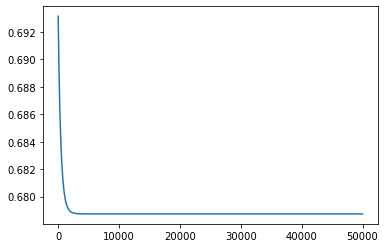

success!


In [22]:
print(bgd_theta)
print(len(bgd_cost))

print(bgd_cost[0])
plt.plot(bgd_cost)
plt.show()

# Test function: Do not remove
assert bgd_theta.shape == (X_train.shape[1] + 1,1) or bgd_theta.shape == (X_train.shape[1] + 1,) or bgd_theta.shape == X_train.shape[1] + 1, "theta shape is incorrect"
assert len(bgd_cost) == iterations, "cost data size is incorrect"

print("success!")
# End Test function

**Expect result (or look alike):**\
[[-0.07328673]\
 [-0.13632896]\
 [ 0.05430939]]\
50000

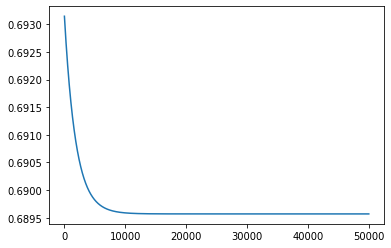

## In lab exercises

1. Verify that the gradient descent solution is correct. Plot the optimal decision boundary you obtain.

2. Write a new class that uses Newton's method for the optmization rather than simple gradient descent.

3. Verify that you obtain a similar solution with Newton's method. Plot the optimal decision boundary you obtain.

4. Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues
   with Newton's method such as a singular or nearly singular Hessian matrix?


### Exercise 1.9 (5 points)

Plot the optimal decision boundary of gradient ascent

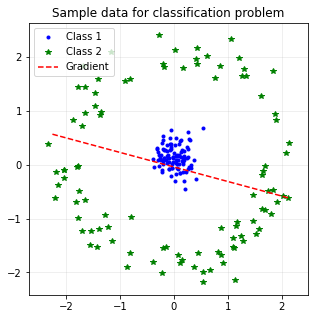

In [23]:
# YOUR CODE HERE
def boundary_points(X, theta):
    theta = theta.reshape(-1,1)
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = np.dot(X , v_parallel)
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_2, point_1

point_1, point_2 = boundary_points(X_train_norm, bgd_theta)

fig1 = plt.figure(figsize=(5, 5))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)

plt.plot(XX[:100,0],XX[:100,1],'b.', label = 'Class 1')
plt.plot(XX[101:,0],XX[101:,1],'g*', label = 'Class 2')
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'r--', label='Gradient')
plt.legend(loc=2)
plt.axis('equal')
plt.show()
# raise NotImplementedError()

**Expect result (or look alike):**\
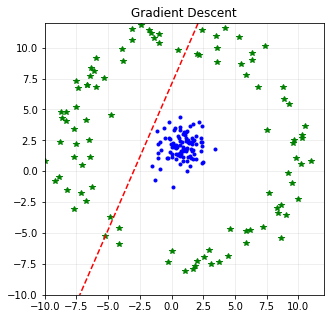

In [24]:
print("Accuracy =",BGD_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 67.5


### Exercise 2.1 (10 points)

Write Newton's method class

In [25]:
class Logistic_NM: #logistic regression for newton's method
      
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = None
        # YOUR CODE HERE
        s = 1/ (1 + np.exp(-z))
        # raise NotImplementedError()
        return s

    def h(self,X, theta):
        hf = None
        # YOUR CODE HERE
        y_hat = np.dot(X,theta)
        hf = self.sigmoid(y_hat)
        # raise NotImplementedError()
        return hf

    def gradient(self, X, y, y_pred):
        grad = None
        # YOUR CODE HERE
        n = X.shape[0]
        grad = np.dot(-X.T, (y-y_pred)/n)
        # raise NotImplementedError()
        return grad
        
    def hessian(self, X, y, theta):
        hess_mat = None
        # YOUR CODE HERE
        y_hat = self.h(X, theta)
        hess_mat = np.dot(X.T,X) * np.diag((np.dot(y_hat.T,1-y_hat)))/len(y)
        # raise NotImplementedError()
        return hess_mat
        
    def costFunc(self, theta, X, y):   
        cost, grad = None, None
        # YOUR CODE HERE
        n = len(X)
        y_pred = self.h(X, theta)
        cost = (np.sum(-(y * np.log(y_pred)) - ((1-y)*np.log(1-y_pred))))/n         
        grad = self.gradient(X, y, y_pred)
        # raise NotImplementedError()
        return cost, grad
    
    def newtonsMethod(self, X, y, theta, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            # YOUR CODE HERE
            cost, grad = self.costFunc(theta, X, y)
            theta = theta - np.dot(np.linalg.inv(self.hessian( X, y, theta)),grad)
            # raise NotImplementedError()
            
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:", J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        # YOUR CODE HERE
        for i in range(X.shape[0]):
            y_hf = self.h(X[i], theta)        
            if y_hf >= 0.5:
                labels.append(1)
            else:
                labels.append(0)
        # raise NotImplementedError()
        
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        percent_correct = None
        # YOUR CODE HERE
        y_predict = self.predict(X, theta)
        percent_correct = np.sum(y_predict == y.T)/len(y)        
        percent_correct = percent_correct *100
        # raise NotImplementedError()
        return percent_correct

In [26]:
# Test function: Do not remove
lbgd = Logistic_NM()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_h = lbgd.hessian(test_x, test_y, test_t)
print('test_h', test_h)
assert test_h.shape == (2, 2), "hessian matrix function is incorrect"
assert np.array_equal(np.round(test_h.T, 5), np.round([[12.17334371, 6.55487738],[ 6.55487738, 14.84880387]], 5)), "hessian matrix function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.newtonsMethod(test_x, test_y, test_t, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.14765747, 0.15607017]], 5)), "newtonsMethod function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.7534506190845247, 5), "newtonsMethod function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_h [[12.17334371  6.55487738]
 [ 6.55487738 14.84880387]]
test_c 0.8719249134773479
Minimum at iteration: 2
test_t_out [[0.14765747 0.15607017]]
test_j [0.8719249134773479, 0.7967484437157274, 0.7534506190845246]
test_l [1 1 1 1 1 1]
test_a 50.0
success!


**Expect result:**
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_h [[12.17334371  6.55487738]\
 [ 6.55487738 14.84880387]]\
test_c 0.8719249134773479\
Minimum at iteration: 2\
test_t_out [[0.14765747 0.15607017]]\
test_j [0.8719249134773479, 0.7967484437157274, 0.7534506190845247]\
test_l [1 1 1 1 1 1]\
test_a 50.0

Minimum at iteration: 999
theta: [[-0.01372483]
 [-0.09332623]
 [-0.3461832 ]]
0.6931471805599453


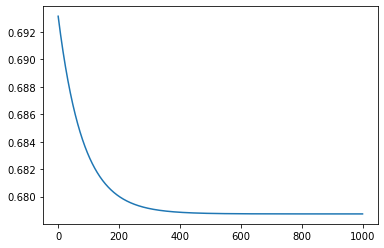

In [27]:
NM_model = Logistic_NM()

iterations = 1000

nm_theta, nm_cost = NM_model.newtonsMethod(X_design_train, y_train, initial_theta, iterations)
print("theta:",nm_theta)

print(nm_cost[0])
plt.plot(nm_cost)
plt.show()

**Expect result (or look alike):**\
Minimum at iteration: 999\
theta: [[-0.07313861]\
 [-0.13605172]\
 [ 0.05419746]]\
0.6931471805599453

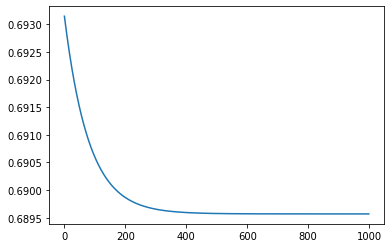

### Exercise 2.2 (5 points)

Plot the optimal decision boundary of Newton method

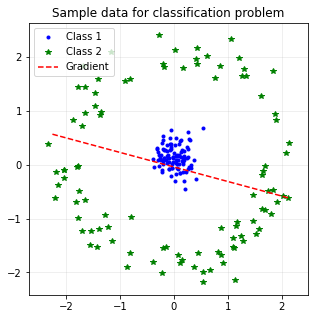

In [28]:
# YOUR CODE HERE
def boundary_points(X, theta):
    theta = theta.reshape(-1,1)
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = np.dot(X , v_parallel)
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_2, point_1

point_1, point_2 = boundary_points(X_train_norm, bgd_theta)

fig1 = plt.figure(figsize=(5, 5))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)

plt.plot(XX[:100,0],XX[:100,1],'b.', label = 'Class 1')
plt.plot(XX[101:,0],XX[101:,1],'g*', label = 'Class 2')
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'r--', label='Gradient')
plt.legend(loc=2)
plt.axis('equal')
plt.show()
# raise NotImplementedError()

**Expect result (or look alike):**

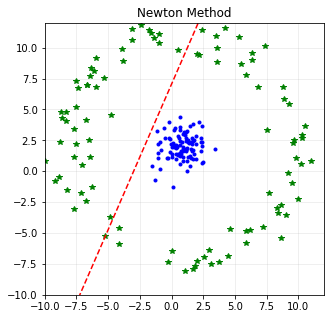

In [29]:
print("Accuracy =",NM_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 67.5


### Exercise 2.3 (5 points)

Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues with Newton's method such as a singular or nearly singular Hessian matrix?

It can be observed that the Gradient Descent needed 50,000 iterations to achieve the same result as Newton's method with only 1000 iterations. So, Newton's method converged faster than Gradient Descent if we compare the number of iterations. However, Newton's method does not work while calculating and inverting a singular or nearly singular Hessian matrix.

## Take-home exercises

1. Perform a *polar transformation* on the data above to obtain a linearly separable dataset. (5 points)

2. Verify that you obtain good classification accuracy for logistic regression with GD or Netwon's method
   after the polar transformation (10 points)
   
3. Apply Newton's method to the dataset you used for the take home exercises in Lab 03. (20 points)




In [30]:
X[:10]

array([[ 0.86675594,  1.07582552],
       [ 1.37493905,  1.35979643],
       [-0.32532951,  1.6966452 ],
       [ 1.76685033,  1.91318294],
       [ 0.75303162,  3.06960352],
       [ 3.37951747,  4.45248514],
       [ 1.1872507 ,  1.70957493],
       [ 1.16520191,  2.07439795],
       [ 2.26929705,  1.12523189],
       [ 0.79918021,  1.39058901]])

In [31]:
# Exercise 1
df = pd.DataFrame(X, columns=['X0', 'X1'])
df['angles'] = np.arctan(df.X1 / df.X0) 
df['radius'] = np.sqrt(df.X0 ** 2 + df.X1 ** 2)
df['y'] = y

newX = df[['angles', 'radius']].values
newX = np.insert(newX, 0, 1, axis=1)
X_train = newX[idx_train]
X_test = newX[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

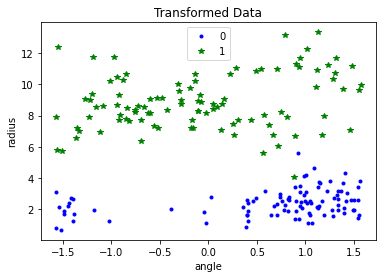

In [32]:
y0 = df[df.y == 0]
y1 = df[df.y == 1]

plt.title('Transformed Data')

plt.plot(y0.angles, y0.radius,'b.', label = '0')
plt.plot(y1.angles, y1.radius,'g*', label = '1')

plt.legend()
plt.xlabel('angle')
plt.ylabel('radius')

plt.show()

In [33]:
# Exercise 2
alpha = 0.005
iterations = 5000

BGD_model = Logistic_BGD()
initial_theta = np.ones((X_train.shape[1],1))

bgd_theta, bgd_cost = BGD_model.gradientAscent(X_train, y_train, initial_theta, alpha, iterations)

Minimum at iteration: 4999


In [34]:
print("Accuracy with Gradient Descent =", BGD_model.getAccuracy(X_train, y_train,bgd_theta))

Accuracy with Gradient Descent = 95.0


In [35]:
iterations = 500

NM_model = Logistic_NM()
nm_theta, nm_cost = NM_model.newtonsMethod(X_train, y_train, initial_theta, iterations)

Minimum at iteration: 499


In [36]:
print("Accuracy of Newtons method =",NM_model.getAccuracy(X_train, y_train, nm_theta))

Accuracy of Newtons method = 98.75


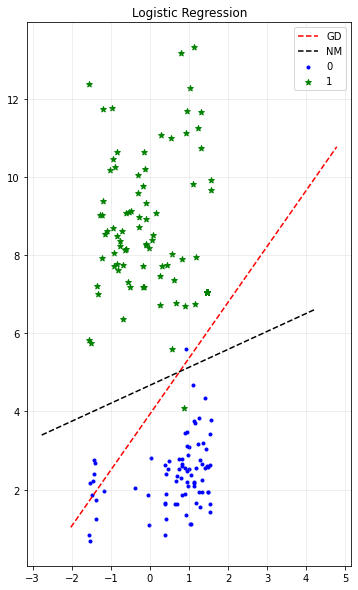

In [37]:
fig = plt.figure(figsize=(10,10)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Logistic Regression')
plt.grid(axis='both', alpha=.25)

idx_0 = np.where(y_train == 0)
idx_1 = np.where(y_train == 1)

ax.scatter (X_train[idx_0,1], X_train[idx_0, 2], c='b',marker='.',label='0')
ax.scatter (X_train[idx_1,1], X_train[idx_1, 2], c='g',marker='*',label='1')

point_1, point_2 = boundary_points(X_train[:,1:], bgd_theta)
point_3, point_4 = boundary_points(X_train[:,1:], nm_theta)
         
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'r--',label='GD')
plt.plot([point_3[0,0], point_4[0,0]],[point_3[1,0], point_4[1,0]], 'k--',label='NM')
plt.legend(loc=0)
plt.show()
#raise NotImplementedError()

In [1]:
# Exercise 3

%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
# Importing Pandas and other libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the data

data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')

# Starting to explore the data

print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

print('Training data:\n', data_train)

Training data shape (614, 13)
Test data shape (367, 12)
Training data:
       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

In [3]:
# Checking for missing values in the training and test data

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [4]:
# Computing ratio of each category value
# Dividing the missing values based on ratio
# Fillin the missing values
# Printing the values before and after filling the missing values for confirmation

print(data_train['Married'].value_counts())

married = data_train['Married'].value_counts()
print('Elements in Married variable', married.shape)
print('Married ratio ', married[0]/sum(married.values))

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)
print(data_train['Married'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

Yes    398
No     213
Name: Married, dtype: int64
Elements in Married variable (2,)
Married ratio  0.6513911620294599
Yes    400
No     214
Name: Married, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
# Another example of filling in missing values for the "number of dependents" attribute.
# Here we see that categorical values are all numeric except one value "3+" 
# Creating a new category value "4" for "3+" and ensure that all the data is numeric

print(data_train['Dependents'].value_counts())
dependent = data_train['Dependents'].value_counts()

print('Dependent ratio 1 ', dependent['0'] / sum(dependent.values))
print('Dependent ratio 2 ', dependent['1'] / sum(dependent.values))
print('Dependent ratio 3 ', dependent['2'] / sum(dependent.values))
print('Dependent ratio 3+ ', dependent['3+'] / sum(dependent.values))

def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

print(data_train['Dependents'].value_counts())

# Converting category value "3+" to "4"

data_train['Dependents'].replace('3+', 4, inplace = True)
data_test['Dependents'].replace('3+', 4, inplace = True)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Dependent ratio 1  0.5759599332220368
Dependent ratio 2  0.17028380634390652
Dependent ratio 3  0.1686143572621035
Dependent ratio 3+  0.08514190317195326
0     354
1     104
2     103
3+     53
Name: Dependents, dtype: int64


In [6]:
print(data_train['LoanAmount'].value_counts())

LoanAmt = data_train['LoanAmount'].value_counts()

print('mean loan amount ', np.mean(data_train["LoanAmount"]))

loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22)
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5)

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
mean loan amount  146.41216216216216


In [7]:
data_train.isnull().sum() 

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data_test.isnull().sum() 

Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
print(data_train['Gender'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64


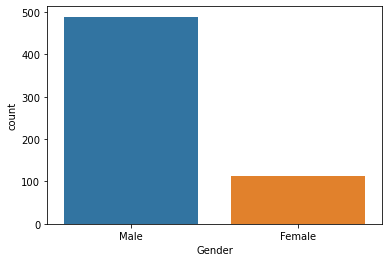

In [10]:
import seaborn as sns
sns.countplot(data_train['Gender'])

In [11]:
pd.crosstab(data_train['Gender'], data_train['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [12]:
data_train['Gender'] = data_train['Gender'].fillna(data_train['Gender'].mode()[0])
data_test['Gender'] = data_test['Gender'].fillna(data_test['Gender'].mode()[0])

data_train['Gender'].replace('Male', 0, inplace = True)
data_test['Gender'].replace('Male', 0, inplace = True)
data_train['Gender'].replace('Female', 1, inplace = True)
data_test['Gender'].replace('Female', 1, inplace = True)

In [13]:
data_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
data_test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [15]:
print(data_train['Self_Employed'].value_counts())

No     500
Yes     82
Name: Self_Employed, dtype: int64


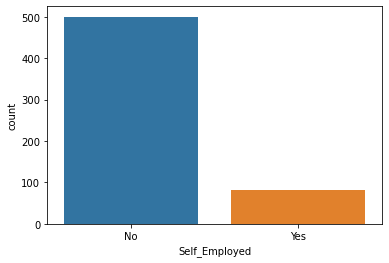

In [16]:
sns.countplot(data_train['Self_Employed'])

In [17]:
# pd.crosstab(data_train['Self_Employed'], data_train['Loan_Status'],margins = True)

In [18]:
data_train['Self_Employed'] = data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0])
data_test['Self_Employed'] = data_test['Self_Employed'].fillna(data_test['Self_Employed'].mode()[0])

data_train['Self_Employed'].replace('No', 0, inplace = True)
data_test['Self_Employed'].replace('No', 0, inplace = True)
data_train['Self_Employed'].replace('Yes', 1, inplace = True)
data_test['Self_Employed'].replace('Yes', 1, inplace = True)

In [19]:
data_train.isnull().sum() 

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
data_test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [21]:
print(data_train['Credit_History'].value_counts())

1.0    475
0.0     89
Name: Credit_History, dtype: int64


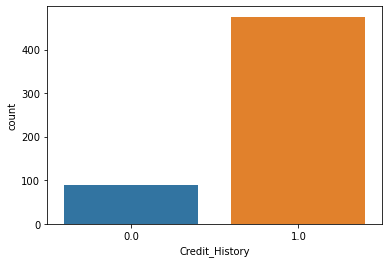

In [22]:
sns.countplot(data_train['Credit_History'])

In [23]:
# pd.crosstab(data_train['Credit_History'], data_train['Loan_Status'], margins = True)

In [24]:
data_train['Credit_History'] = data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0])
data_test['Credit_History'] = data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0])

In [25]:
data_train.isnull().sum() 

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
data_test.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

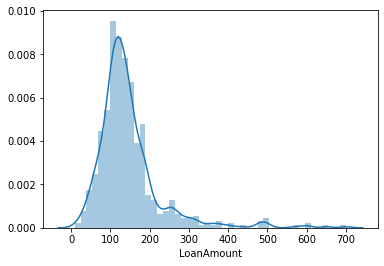

In [27]:
sns.distplot(data_train['LoanAmount'])

In [28]:
print(data_train['Loan_Amount_Term'].value_counts())

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [29]:
data_train['Loan_Amount_Term'] = data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0])
data_test['Loan_Amount_Term'] = data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].mode()[0])

In [30]:
data_train.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
data_test.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [32]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,No,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,Yes,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,Yes,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,Yes,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,No,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,No,0,Graduate,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,0,Yes,4,Graduate,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,0,Yes,1,Graduate,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,0,Yes,2,Graduate,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [33]:
data_train['Married'].replace('No', 0, inplace = True)
data_test['Married'].replace('No', 0, inplace = True)
data_train['Married'].replace('Yes', 1, inplace = True)
data_test['Married'].replace('Yes', 1, inplace = True)

In [34]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,Graduate,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,0,1,4,Graduate,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,0,1,1,Graduate,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,0,1,2,Graduate,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [35]:
data_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,Graduate,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,1,1,Graduate,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,0,1,2,Graduate,0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,0,1,2,Graduate,0,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,0,0,0,Not Graduate,0,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,4,Not Graduate,1,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,0,1,0,Graduate,0,4158,709,115.0,360.0,1.0,Urban
364,LP002980,0,0,0,Graduate,0,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,0,1,0,Graduate,0,5000,2393,158.0,360.0,1.0,Rural


In [36]:
data_train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [37]:
data_train['Property_Area'].replace('Rural', 0, inplace = True)
data_train['Property_Area'].replace('Semiurban', 1, inplace = True)
data_train['Property_Area'].replace('Urban', 2, inplace = True)

In [38]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,0,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,0,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,0,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,0,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,Graduate,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,LP002979,0,1,4,Graduate,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,LP002983,0,1,1,Graduate,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,LP002984,0,1,2,Graduate,0,7583,0.0,187.000000,360.0,1.0,2,Y


In [39]:
data_test['Property_Area'].replace('Rural', 0, inplace = True)
data_test['Property_Area'].replace('Semiurban', 1, inplace = True)
data_test['Property_Area'].replace('Urban', 2, inplace = True)

In [40]:
data_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,Graduate,0,5720,0,110.0,360.0,1.0,2
1,LP001022,0,1,1,Graduate,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,0,1,2,Graduate,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,0,1,2,Graduate,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,0,0,0,Not Graduate,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,4,Not Graduate,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,0,1,0,Graduate,0,4158,709,115.0,360.0,1.0,2
364,LP002980,0,0,0,Graduate,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,0,1,0,Graduate,0,5000,2393,158.0,360.0,1.0,0


In [41]:
data_train['Loan_Status'].replace('N', 0, inplace = True)
data_train['Loan_Status'].replace('Y', 1, inplace = True)

In [42]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,Graduate,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,0,1,4,Graduate,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,0,1,1,Graduate,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,0,1,2,Graduate,0,7583,0.0,187.000000,360.0,1.0,2,1


In [43]:
data_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,Graduate,0,5720,0,110.0,360.0,1.0,2
1,LP001022,0,1,1,Graduate,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,0,1,2,Graduate,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,0,1,2,Graduate,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,0,0,0,Not Graduate,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,4,Not Graduate,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,0,1,0,Graduate,0,4158,709,115.0,360.0,1.0,2
364,LP002980,0,0,0,Graduate,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,0,1,0,Graduate,0,5000,2393,158.0,360.0,1.0,0


In [44]:
data_train['Education'].replace('Not Graduate', 0, inplace = True)
data_test['Education'].replace('Not Graduate', 0, inplace = True)
data_train['Education'].replace('Graduate', 1, inplace = True)
data_test['Education'].replace('Graduate', 1, inplace = True)

In [45]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,0,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [46]:
data_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,0,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,0,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,0,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,0,0,0,0,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,4,0,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,0,1,0,1,0,4158,709,115.0,360.0,1.0,2
364,LP002980,0,0,0,1,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,0,1,0,1,0,5000,2393,158.0,360.0,1.0,0


In [47]:
data_train = data_train.drop(['Loan_ID'],axis = 1)
data_test = data_test.drop(['Loan_ID'],axis = 1)

In [48]:
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,0,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [49]:
data_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,0,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,0,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,0,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,0,0,0,0,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,4,0,1,4009,1777,113.0,360.0,1.0,2
363,0,1,0,1,0,4158,709,115.0,360.0,1.0,2
364,0,0,0,1,0,3250,1993,126.0,360.0,1.0,1
365,0,1,0,1,0,5000,2393,158.0,360.0,1.0,0


In [50]:
trainX = data_train.drop('Loan_Status', axis = 1 )
y = data_train['Loan_Status']

In [51]:
def normalized_data(data):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0) 
    data_norm = (data - means) / stds
    return data_norm

In [52]:
# normalizing data
X = normalized_data(np.array(trainX.astype(float)))

In [53]:
X.shape

(614, 11)

In [54]:
y = (np.array(y)).reshape(-1,1)

In [55]:
y.shape

(614, 1)

In [56]:
m, n = X.shape
XX = np.insert(X, 0, 1, axis=1)
idx = np.arange(0, m)
np.random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];
y_train = y[train_idx];
y_test = y[test_idx];

In [57]:
class Logistic_NM: #logistic regression for newton's method
      
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = None
        # YOUR CODE HERE
        s = 1/ (1 + np.exp(-z))
        # raise NotImplementedError()
        return s

    def h(self,X, theta):
        hf = None
        # YOUR CODE HERE
        y_hat = np.dot(X,theta)
        hf = self.sigmoid(y_hat)
        # raise NotImplementedError()
        return hf

    def gradient(self, X, y, y_pred):
        grad = None
        # YOUR CODE HERE
        n = X.shape[0]
        grad = np.dot(-X.T, (y-y_pred)/n)
        # raise NotImplementedError()
        return grad
        
    def hessian(self, X, y, theta):
        hess_mat = None
        # YOUR CODE HERE
        y_hat = self.h(X, theta)
        hess_mat = np.dot(X.T,X) * np.diag((np.dot(y_hat.T,1-y_hat)))/len(y)
        # raise NotImplementedError()
        return hess_mat
        
    def costFunc(self, theta, X, y):   
        cost, grad = None, None
        # YOUR CODE HERE
        n = len(X)
        y_pred = self.h(X, theta)
        cost = (np.sum(-(y * np.log(y_pred)) - ((1-y)*np.log(1-y_pred))))/n         
        grad = self.gradient(X, y, y_pred)
        # raise NotImplementedError()
        return cost, grad
    
    def newtonsMethod(self, X, y, theta, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            # YOUR CODE HERE
            cost, grad = self.costFunc(theta, X, y)
            theta = theta - np.dot(np.linalg.inv(self.hessian( X, y, theta)),grad)
            # raise NotImplementedError()
            
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:", J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        # YOUR CODE HERE
        for i in range(X.shape[0]):
            y_hf = self.h(X[i], theta)        
            if y_hf >= 0.5:
                labels.append(1)
            else:
                labels.append(0)
        # raise NotImplementedError()
        
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        percent_correct = None
        # YOUR CODE HERE
        y_predict = self.predict(X, theta)
        percent_correct = np.sum(y_predict == y.T)/len(y)        
        percent_correct = percent_correct *100
        # raise NotImplementedError()
        return percent_correct

Minimum at iteration: 1999
0.6931471805599453


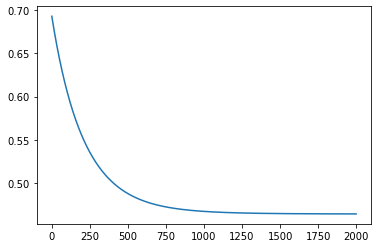

In [58]:
NM_model = Logistic_NM()

iterations = 2000
initial_theta = np.zeros((X_train.shape[1],1))
nm_theta, nm_cost = NM_model.newtonsMethod(X_train, y_train, initial_theta, iterations)

print(nm_cost[0])
plt.plot(nm_cost)
plt.show()

In [59]:
print("Accuracy =", NM_model.getAccuracy(X_test, y_test, nm_theta))

Accuracy = 80.89430894308943


## The report

Write a brief report covering your experiments (both in lab and take home) and send as a Jupyter notebook
to the TAs, Manish and Abhishek before the next lab.

In your solution, be sure to follow instructions.

For the data used in the lab, it can be observed that the Gradient Descent took comparatively a very high number of iterations (which is 50,000 iterations) to achieve the same result as Newton's method with only 1000 iterations. So, it is proved from the experiments that Newton's method performs better and converges earlier than Gradient Descent. In the home exercises, a polar transformation was performed on this data to obtain linearly separable classes. Then logistic regression was used with both Gradient Descent and Newton's method, where Newton's method could separate the classes more precisely and more accurately than Gradient Descent. Lastly, Newton's method could achieve 80.89% accuracy for the Load Prediction Dataset with only 2000 iterations.